In [358]:
#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

In [359]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

In [415]:
temp_df = pd.read_csv(r"./data/20082018.csv")
y = pd.read_csv(r"./data/mean_of_month_1.csv")

In [361]:
temp_df.columns

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)',

## 탐색적 분석
- 일사 vs 일조

일사량과 일조시간 중 일조시간을 선택하기로 한다.<br>
일사량은 태양의 복사에너지가 지면에 닿는 양, 일조 시간은 햇빛이 비치는 시간<br>
합계 일사는 데이터가 거의 없음<br>

- 정선 없앰

In [362]:
# 261-해남, 216-태백 ,217-정선 , 105-강릉
df = temp_df[['지점','일시','평균기온(°C)','최고기온(°C)','최저기온(°C)','합계 일조 시간(hr)','1시간 최다강수량(mm)','일강수량(mm)','최대 풍속(m/s)']]
df['지점_nm'] = df['지점'].apply(lambda x : '해남' if x==261 else('태백' if x==216 else ('정선' if x==217 else '강릉')))
df['년월'] = df['일시'].apply(lambda x : x[:-3]) # yyyy-mm형식
df['월'] = df['년월'].apply(lambda x : x[5:]) # mm형식
df['도'] = df['지점'].apply(lambda x : '전라도' if x==261 else '강원도') # 강원도 전라도로 변환

In [363]:
# 결측값 %확인
print(df.isna().sum())
print('==================================')
print(df.shape)

지점                   0
일시                   0
평균기온(°C)            18
최고기온(°C)             1
최저기온(°C)             3
합계 일조 시간(hr)       100
1시간 최다강수량(mm)    11546
일강수량(mm)          9486
최대 풍속(m/s)          10
지점_nm                0
년월                   0
월                    0
도                    0
dtype: int64
(15104, 13)


In [364]:
# '평균기온(°C)', '합계 일조 시간(hr)', '최대 풍속(m/s)' na포함된 행 삭제
df = df.ix[df[['평균기온(°C)','최고기온(°C)','최저기온(°C)','합계 일조 시간(hr)','최대 풍속(m/s)']].dropna(axis=0).index]
# print(df.isna().sum())

# '평균기온(°C)', '합계 일조 시간(hr)', '최대 풍속(m/s)' na포함된 행 삭제
df = df.fillna(value=0)
# print(df.isna().sum())

# 정선 drop
df = df[df['지점_nm']!='정선']

### 평균기온
- 평균 기온지 제일 높은 곳은 강릉

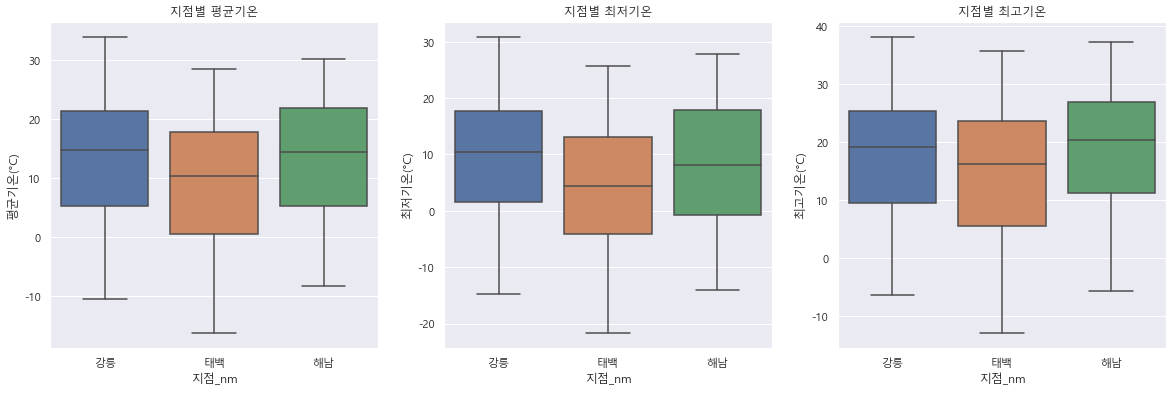

In [367]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))
sns.boxplot(x='지점_nm', y='평균기온(°C)', data=df, ax=axs[0])
sns.boxplot(x='지점_nm', y='최저기온(°C)', data=df, ax=axs[1])
sns.boxplot(x='지점_nm', y='최고기온(°C)', data=df, ax=axs[2])
axs[0].set_title('지점별 평균기온')
axs[1].set_title('지점별 최저기온')
axs[2].set_title('지점별 최고기온')
plt.show()

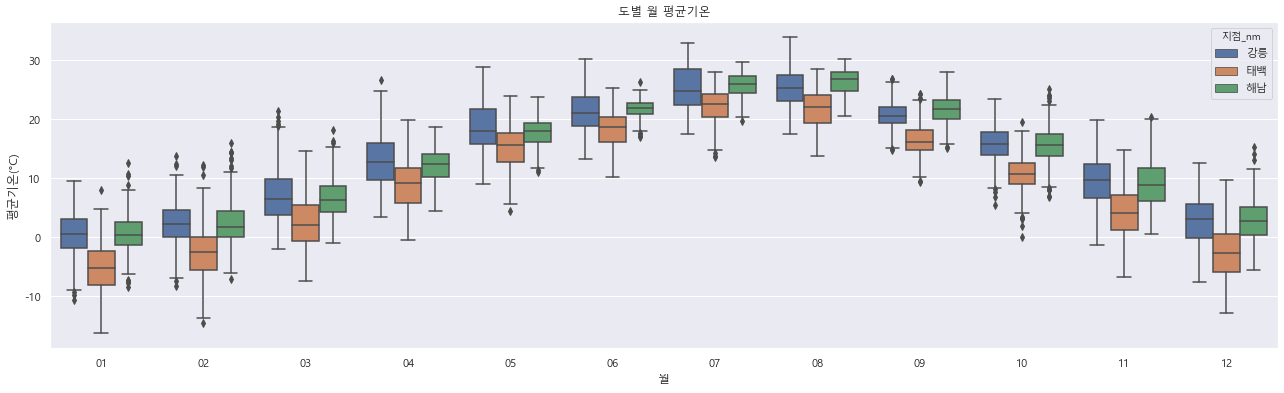

In [368]:
fig, axs = plt.subplots(figsize=(22, 6))
sns.boxplot(x='월', y='평균기온(°C)', data=df, hue='지점_nm').set_title('도별 월 평균기온')
plt.show()

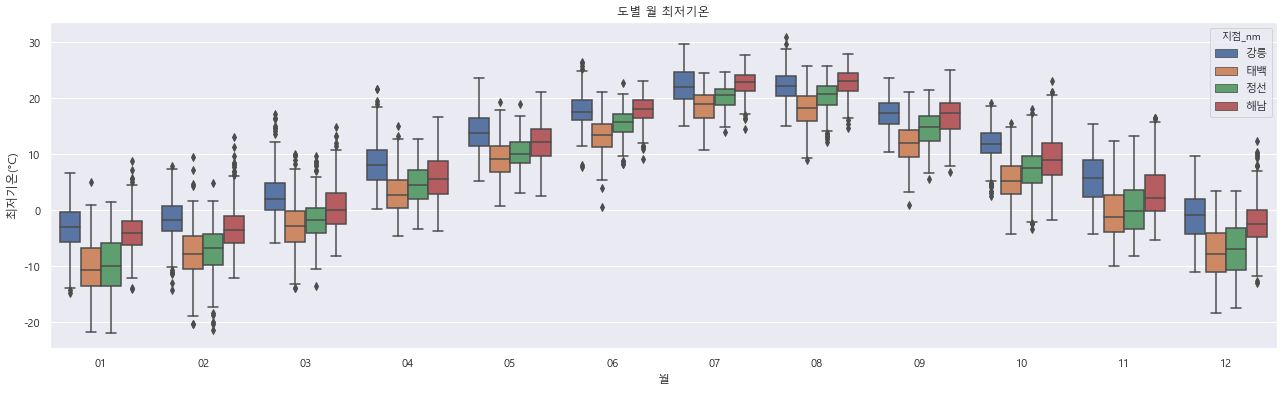

In [218]:
fig, axs = plt.subplots(figsize=(22, 6))
sns.boxplot(x='월', y='최저기온(°C)', data=df, hue='지점_nm').set_title('도별 월 최저기온')
plt.show()

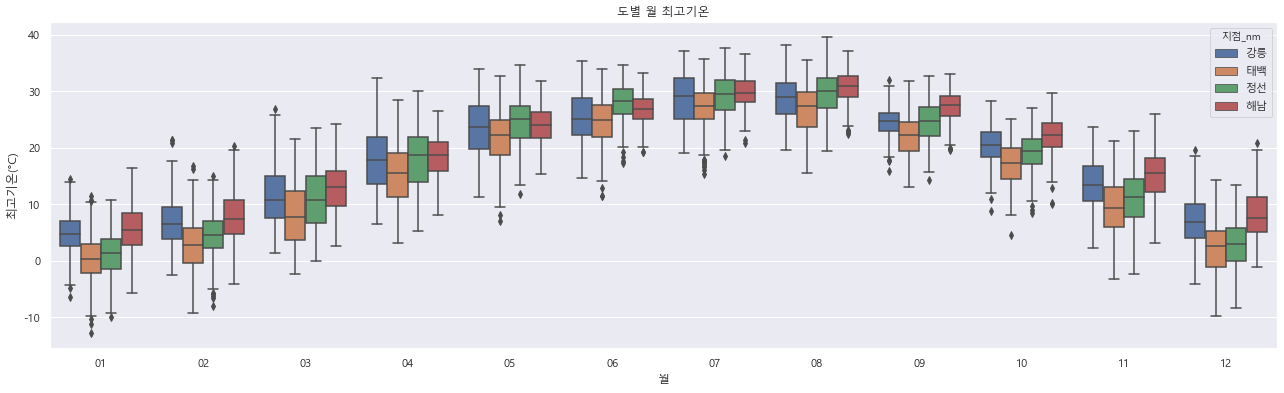

In [219]:
fig, axs = plt.subplots(figsize=(22, 6))
sns.boxplot(x='월', y='최고기온(°C)', data=df, hue='지점_nm').set_title('도별 월 최고기온')
plt.show()

### 일조시간

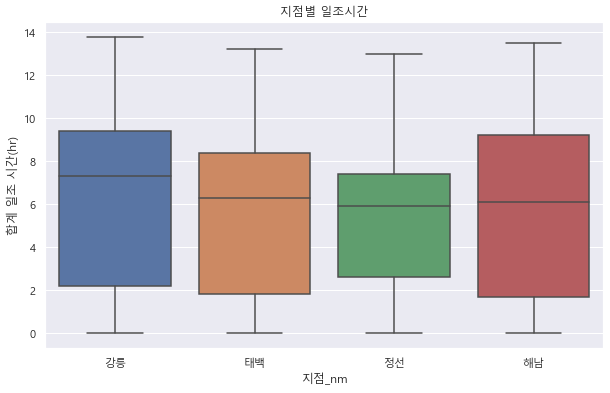

In [213]:
fig, axs = plt.subplots(figsize=(10, 6))
sns.boxplot(x='지점_nm', y='합계 일조 시간(hr)', data=df).set_title('지점별 일조시간')
plt.show()

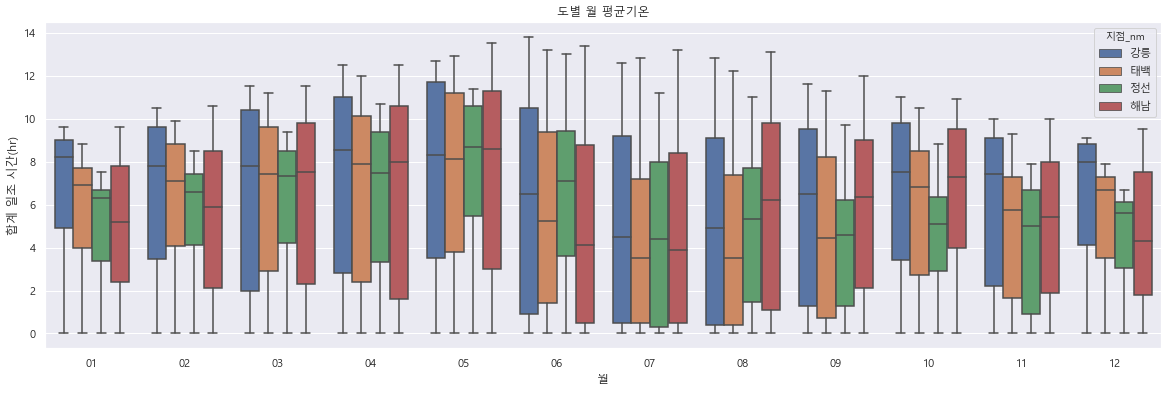

In [212]:
fig, axs = plt.subplots(figsize=(20, 6))
sns.boxplot(x='월', y='합계 일조 시간(hr)', data=df, hue='지점_nm').set_title('도별 월 평균기온')
plt.show()

## 데이터 전처리

In [369]:
df_temp = df.copy()

In [60]:
# df_month['도'].value_counts()
# df_month['지점'].value_counts()

### 기온구간
- -5도 이하 > 0
- 5도 이하 > 1
- 15도 이하 > 2
- 25도 이하 > 3
- 35도 이하 > 4

In [401]:
df_temp['기온구간'] = df_temp['평균기온(°C)'].apply(lambda x : 0 if x< -5 
                                              else (1 if x<5 
                                                    else (2 if x<15 
                                                          else(3 if x<25 else 4
                                                              )
                                                         )
                                                   )
                                             )

In [371]:
print(df_temp['기온구간'].value_counts())
# print('='*50)
# print(df_month['평균기온(°C)'][df_month['기온구간'] == 5])

3    4269
2    3294
1    2948
4    1035
0     444
Name: 기온구간, dtype: int64


### 일조시간구간
- 3시간 이하 >> 0
- 6시간 이하 >> 1
- 9시간 이하 >> 2
- 12시간 이하 >> 3
- 15시간 이하 >> 4

In [405]:
df_temp['일조시간구간'] = df_temp['합계 일조 시간(hr)'].apply(lambda x : 0 if x< 3 
                                              else (1 if x<6 
                                                    else (2 if x<9 
                                                          else(3 if x<12 else 4
                                                              )
                                                         )
                                                   )
                                             )

In [406]:
df_temp['일조시간구간'].value_counts()

0    3616
2    3281
3    2798
1    1895
4     400
Name: 일조시간구간, dtype: int64

### 최고기온

In [374]:
# df_temp['최고기온일수'] = df_temp['최고기온(°C)'].apply(lambda x : 1 if x >=35 else 0)
df_temp['최고기온일수'] = df_temp['최고기온(°C)'].apply(lambda x : 1 if x >=30 else 0) # 30도로 확정

In [375]:
# df_temp['최고기온(°C)'][df_temp['최고기온일수']==1]
df_temp['최고기온일수'].value_counts()

0    10969
1     1021
Name: 최고기온일수, dtype: int64

### 최저기온일수
- 배추가 -8도이하 일 경우, 동해를 입으므로 -8이하를 최저기온으로 정함

In [376]:
df_temp['최저기온일수'] = df_temp['최저기온(°C)'].apply(lambda x : 1 if x<=-8 else 0)

In [379]:
# df_temp['최저기온(°C)'][df_temp['최저기온일수']==1]
df_temp['최저기온일수'].value_counts()

0    11237
1      753
Name: 최저기온일수, dtype: int64

### 1시간 최다강수량기간
- 10mm미만 >> 0
- 20mm미만 >> 1
- 40mm미만 >> 2
- 40mm이상 >> 3

In [380]:
df_temp['1H최다강수량'] = df_temp['1시간 최다강수량(mm)'].apply(lambda x : 0 if x< 10 
                                              else (1 if x<20
                                                    else (2 if x<40 else 3)
                                                    )
                                                )

In [387]:
# df_temp['1시간 최다강수량(mm)'][df_temp['1H최다강수량']==3]
df_temp['1H최다강수량'].value_counts()

0    11629
1      241
2      106
3       14
Name: 1H최다강수량, dtype: int64

### 강수량
- 0mm > 0
- 40mm이하 > 1
- 80mm이하 > 2
- 110mm이하 > 3
- 110mm이상 > 4

In [388]:
df_temp['강수량구간'] = df_temp['일강수량(mm)'].apply(lambda x : 0 if x== 0 
                                              else (1 if x<40
                                                    else (2 if x<80 
                                                          else(3 if x<110 else 4
                                                              )
                                                         )
                                                   )
                                             )

In [389]:
# df_temp['1시간 최다강수량(mm)'][df_temp['1H최다강수량']==3]
df_temp['강수량구간'].value_counts()

0    8123
1    3628
2     164
3      46
4      29
Name: 강수량구간, dtype: int64

### 최대풍속
- 4 미만 > 0
- 10 미만 > 1
- 14 미만 > 2
- 14 이상 > 3

In [390]:
df_temp['최대풍속'] = df_temp['최대 풍속(m/s)'].apply(lambda x : 0 if x< 4
                                              else (1 if x<10
                                                    else (2 if x<14 else 3)
                                                    )
                                                )

In [395]:
# df_temp['최대 풍속(m/s)'][df_temp['최대풍속']==2]
df_temp['최대풍속'].value_counts()

1    8816
0    3079
2      89
3       6
Name: 최대풍속, dtype: int64

### 월단위 변환

In [407]:
df_month = df_temp[['년월','도','기온구간','일조시간구간','최고기온일수','최저기온일수','1H최다강수량','강수량구간','최대풍속']].copy()
df_month.head()

,년월,도,기온구간,일조시간구간,최고기온일수,최저기온일수,1H최다강수량,강수량구간,최대풍속
0,2008-01,강원도,1,2,0,0,0,0,1
1,2008-01,강원도,1,3,0,0,0,0,1
2,2008-01,강원도,1,1,0,0,0,0,1
3,2008-01,강원도,1,2,0,0,0,0,1
4,2008-01,강원도,2,2,0,0,0,0,1


In [409]:
# 각각 one-hot-encoding설정
tem_ohe = pd.get_dummies(df_month['기온구간'])
tem_ohe.columns = ['평균기온(-5미만)','평균기온(-5~5미만)','평균기온(5~15미만)','평균기온(15~25미만)','평균기온(25~35미만)']

sun_ohe = pd.get_dummies(df_month['일조시간구간'])
sun_ohe.columns = ['일조시간(3미만)','일조시간(3~6미만)','일조시간(6~9미만)','일조시간(9~12미만)','일조시간(12~15미만)']

rain_1h_ohe = pd.get_dummies(df_month['1H최다강수량'])
rain_1h_ohe.columns = ['1H최다강수량(10미만)','1H최다강수량(10~20미만)','1H최다강수량(20~40미만)','1H최다강수량(40이상)']

rain_ohe = pd.get_dummies(df_month['강수량구간'])
rain_ohe.columns = ['일강수량(0)','일강수량(1~40미만)','일강수량(40~80미만)','일강수량(80~110미만)','일강수량(110이상)']

wind_ohe = pd.get_dummies(df_month['최대풍속'])
wind_ohe.columns = ['최대풍속(0~4미만)','최대풍속(4~10미만)','최대풍속(10~14미만)','최대풍속(14이상)']


df_month = pd.concat([df_month,tem_ohe,tem_dif_ohe,sun_ohe,rain_1h_ohe,rain_ohe,wind_ohe],axis=1)

In [410]:
final_df = pd.DataFrame(df_month.groupby(['년월','도'])[
    '평균기온(-5미만)','평균기온(-5~5미만)','평균기온(5~15미만)','평균기온(15~25미만)','평균기온(25~35미만)',
    '일조시간(3미만)','일조시간(3~6미만)','일조시간(6~9미만)','일조시간(9~12미만)','일조시간(12~15미만)',
    '최고기온일수','최저기온일수',
    '1H최다강수량(10미만)','1H최다강수량(10~20미만)','1H최다강수량(20~40미만)','1H최다강수량(40이상)',
    '일강수량(0)','일강수량(1~40미만)','일강수량(40~80미만)','일강수량(80~110미만)','일강수량(110이상)',
    '최대풍속(0~4미만)','최대풍속(4~10미만)','최대풍속(10~14미만)','최대풍속(14이상)'
].sum())
final_df.shape

(264, 25)

In [411]:
# '도'를 index에서 column으로 변환
final_df.reset_index(level=['도'], inplace=True)

In [413]:
final_df.columns

Index(['도', '평균기온(-5미만)', '평균기온(-5~5미만)', '평균기온(5~15미만)', '평균기온(15~25미만)',
       '평균기온(25~35미만)', '일조시간(3미만)', '일조시간(3~6미만)', '일조시간(6~9미만)',
       '일조시간(9~12미만)', '일조시간(12~15미만)', '최고기온일수', '최저기온일수', '1H최다강수량(10미만)',
       '1H최다강수량(10~20미만)', '1H최다강수량(20~40미만)', '1H최다강수량(40이상)', '일강수량(0)',
       '일강수량(1~40미만)', '일강수량(40~80미만)', '일강수량(80~110미만)', '일강수량(110이상)',
       '최대풍속(0~4미만)', '최대풍속(4~10미만)', '최대풍속(10~14미만)', '최대풍속(14이상)'],
      dtype='object')

### 배추값 전처리

In [416]:
y['mm'] = y['mm'].apply(lambda x : str(x).zfill(2))
y['yyyy'] = y['yyyy'].apply(lambda x : str(x))
y['년월'] = y['yyyy']+'-'+y['mm']
fin_y = y[['년월','kgPrice']]

In [417]:
fin_y.head()

,년월,kgPrice
0,2008-01,968.499267
1,2008-02,837.201915
2,2008-03,1011.106582
3,2008-04,1091.977029
4,2008-05,956.656571


### data셋

In [ ]:
cabbage_data = pd.merge(final_df, fin_y, on='년월', how='left')

In [419]:
cabbage_data

,년월,도,평균기온(-5미만),평균기온(-5~5미만),평균기온(5~15미만),평균기온(15~25미만),평균기온(25~35미만),일조시간(3미만),일조시간(3~6미만),일조시간(6~9미만),...,일강수량(0),일강수량(1~40미만),일강수량(40~80미만),일강수량(80~110미만),일강수량(110이상),최대풍속(0~4미만),최대풍속(4~10미만),최대풍속(10~14미만),최대풍속(14이상),kgPrice
0,2008-01,강원도,15.0,43.0,4.0,0.0,0.0,21.0,9.0,27.0,...,43.0,19.0,0.0,0.0,0.0,13.0,48.0,1.0,0.0,968.499267
1,2008-01,전라도,0.0,29.0,2.0,0.0,0.0,13.0,8.0,10.0,...,24.0,7.0,0.0,0.0,0.0,5.0,26.0,0.0,0.0,968.499267
2,2008-02,강원도,16.0,37.0,5.0,0.0,0.0,5.0,11.0,15.0,...,56.0,2.0,0.0,0.0,0.0,9.0,48.0,1.0,0.0,837.201915
3,2008-02,전라도,0.0,28.0,1.0,0.0,0.0,4.0,5.0,10.0,...,25.0,4.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,837.201915
4,2008-03,강원도,0.0,27.0,35.0,0.0,0.0,21.0,10.0,12.0,...,41.0,20.0,1.0,0.0,0.0,7.0,55.0,0.0,0.0,1011.106582
5,2008-03,전라도,0.0,9.0,22.0,0.0,0.0,8.0,3.0,10.0,...,20.0,11.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0,1011.106582
6,2008-04,강원도,0.0,2.0,47.0,11.0,0.0,19.0,5.0,9.0,...,39.0,21.0,0.0,0.0,0.0,6.0,51.0,3.0,0.0,1091.977029
7,2008-04,전라도,0.0,0.0,25.0,5.0,0.0,10.0,3.0,9.0,...,22.0,8.0,0.0,0.0,0.0,0.0,28.0,2.0,0.0,1091.977029
8,2008-05,강원도,0.0,0.0,23.0,37.0,2.0,17.0,8.0,15.0,...,46.0,16.0,0.0,0.0,0.0,6.0,55.0,1.0,0.0,956.656571
9,2008-05,전라도,0.0,0.0,7.0,24.0,0.0,8.0,6.0,4.0,...,19.0,11.0,0.0,1.0,0.0,0.0,30.0,1.0,0.0,956.656571


In [422]:
cabbage_data.shape

(264, 28)

In [423]:
cabbage_data.to_csv('cabbage_data.csv', encoding='utf-8-sig')